In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import seaborn as sns

In [3]:
from math import exp, ceil

In [4]:
%matplotlib inline

In [5]:
class Option:
    def __compute_width(self):
        dt = (ceil(float(365)/self.term_unit))/float(self.term_step_count)
        M = exp(-self.reversion_rate * dt) - 1.0
        jmax = int((-0.184 / M) + 1)
        return 2*jmax+1
    
    def __compute_height(self):
        return int(self.term_step_count * (ceil(float(365)/self.term_unit)) * self.maturity) + 1
    
    def __init__(self, term_unit, maturity, term_step_count, reversion_rate):
        self.term_unit = term_unit
        self.maturity = maturity
        self.term_step_count = term_step_count
        self.reversion_rate = reversion_rate
        self.width = self.__compute_width()
        self.height = self.__compute_height()

In [6]:
def get_row_list_from_string(row):
    return row.replace('[', '').replace(']', '').replace('\n', '').split(',')

def get_options_from_row_list(x):
    maturity = int(float(x[1]))
    term_unit = int(x[3])
    term_step_count = int(x[4])
    reversion_rate = float(x[5])
    return Option(term_unit, maturity, term_step_count, reversion_rate)

def get_options(filename):
    with open(filename , 'r') as f:
        return list(map(get_options_from_row_list, np.array(list(map(get_row_list_from_string, f.readlines()))).T))

In [7]:
def print_jointplots(f):
    options = get_options(f)
    op_len = len(options)

    widths = np.array(list(map(lambda o: o.width,options)))
    heights = np.array(list(map(lambda o: o.height,options)))

    h = sns.jointplot(x=widths,
              y=heights,
              kind='scatter',
              size=13,
              color='red') # bi-variate

    h.set_axis_labels('tree width', 'tree height', fontsize=16)

In [17]:
def print_datainfo(f):
    options = get_options(f)
    op_len = len(options)
    widths = np.array(list(map(lambda o: o.width,options)))
    heights = np.array(list(map(lambda o: o.height,options)))
    prods = np.sum(np.array(list(map(lambda o: o.width * o.height,options))))

    print('file: ' + f)
    print('Options count: ' + str(op_len))
    print(':::Widths:::')
    print('min: ' + str(min(widths)))
    print('max: ' + str(max(widths)))
    print('mean: {0:0.2f}'.format(np.mean(widths)))
    print('variance: {0:0.2f}'.format(np.var(widths)))
    print('standard deviation: {0:0.2f}'.format(np.std(widths)))
    print('skewness: {0:0.2f}'.format(skew(widths)))
    print('kurtosis: {0:0.2f}'.format(kurtosis(widths)))
    print(':::Heights:::')
    print('min: ' + str(min(heights)))
    print('max: ' + str(max(heights)))
    print('mean: {0:0.2f}'.format(np.mean(heights)))
    print('variance: {0:0.2f}'.format(np.var(heights)))
    print('standard deviation: {0:0.2f}'.format(np.std(heights)))
    print('skewness: {0:0.2f}'.format(skew(heights)))
    print('kurtosis: {0:0.2f}'.format(kurtosis(heights)))
    print('\n')


In [18]:
filenames = ["0_UNIFORM.in", "1_RAND.in", "2_RANDCONSTHEIGHT.in", "3_RANDCONSTWIDTH.in", 
             "4_SKEWED.in", "5_SKEWEDCONSTHEIGHT.in", "6_SKEWEDCONSTWIDTH.in", "7_RAND_HEIGHT_IN_0-3500.in",
             "8_RAND_HEIGHT_IN_0-1200.in", "9_RAND_HEIGHT_IN_50-250.in", "10_RAND_HEIGHT_IN_50-500.in", 
             "11_RAND_HEIGHT_IN_100-300.in", "12_RAND_HEIGHT_IN_100-700.in"]

# Data distributions

## UNIFORM

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: 0_UNIFORM.in
Options count: 65536
:::Widths:::
min: 47
max: 47
mean: 47.00
variance: 0.00
standard deviation: 0.00
skewness: 0.00
kurtosis: -3.00
:::Heights:::
min: 109
max: 109
mean: 109.00
variance: 0.00
standard deviation: 0.00
skewness: 0.00
kurtosis: -3.00




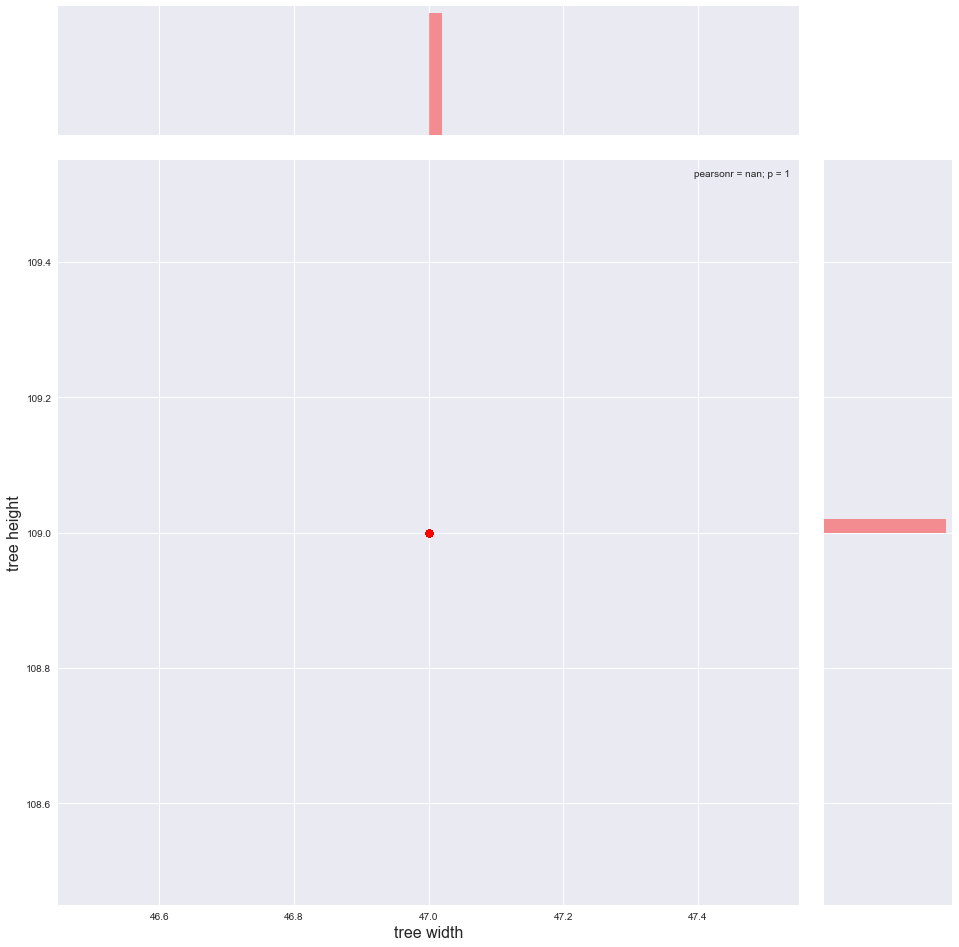

In [19]:
print_jointplots(filenames[0])
print_datainfo(filenames[0])

## RANDOM

file: 1_RAND.in
Options count: 65536
:::Widths:::
min: 7
max: 1023
mean: 510.77
variance: 85197.14
standard deviation: 291.89
skewness: 0.01
kurtosis: -1.20
:::Heights:::
min: 13
max: 1201
mean: 605.27
variance: 119988.40
standard deviation: 346.39
skewness: 0.01
kurtosis: -1.20




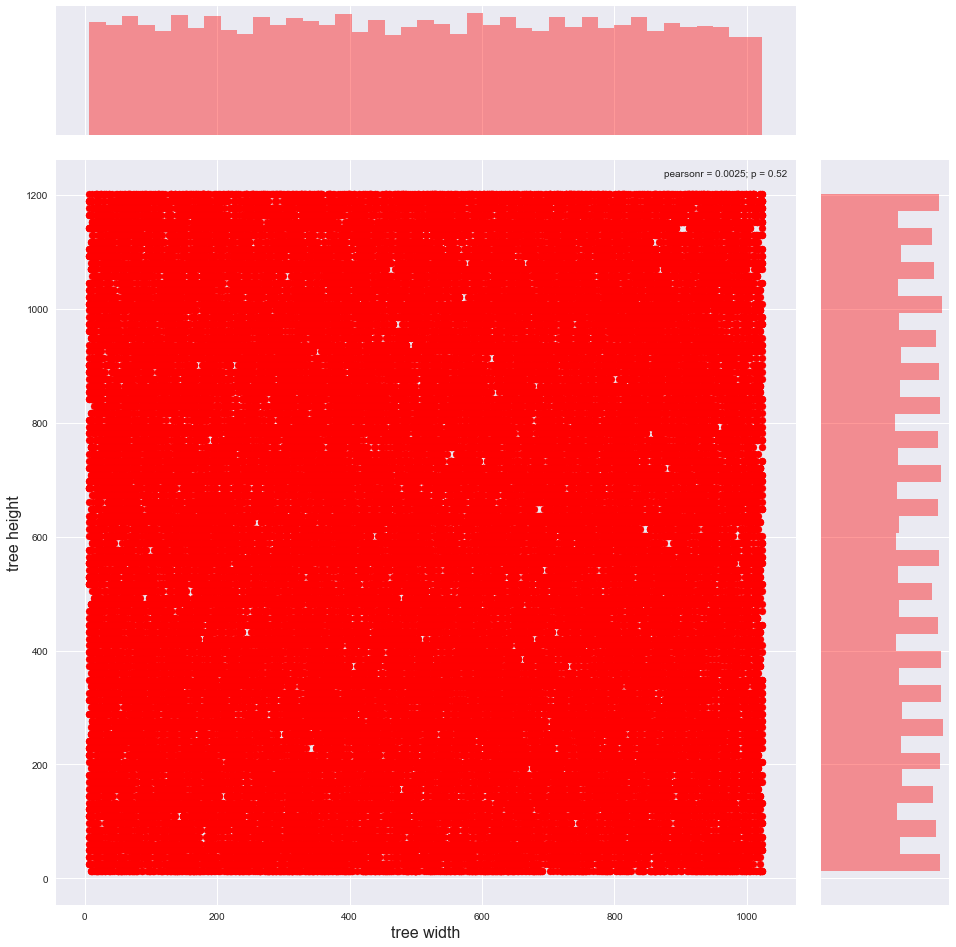

In [20]:
print_jointplots(filenames[1])
print_datainfo(filenames[1])

## RANDOM with constant heights

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: 2_RANDCONSTHEIGHT.in
Options count: 65536
:::Widths:::
min: 7
max: 1023
mean: 509.95
variance: 85606.06
standard deviation: 292.59
skewness: 0.01
kurtosis: -1.20
:::Heights:::
min: 109
max: 109
mean: 109.00
variance: 0.00
standard deviation: 0.00
skewness: 0.00
kurtosis: -3.00




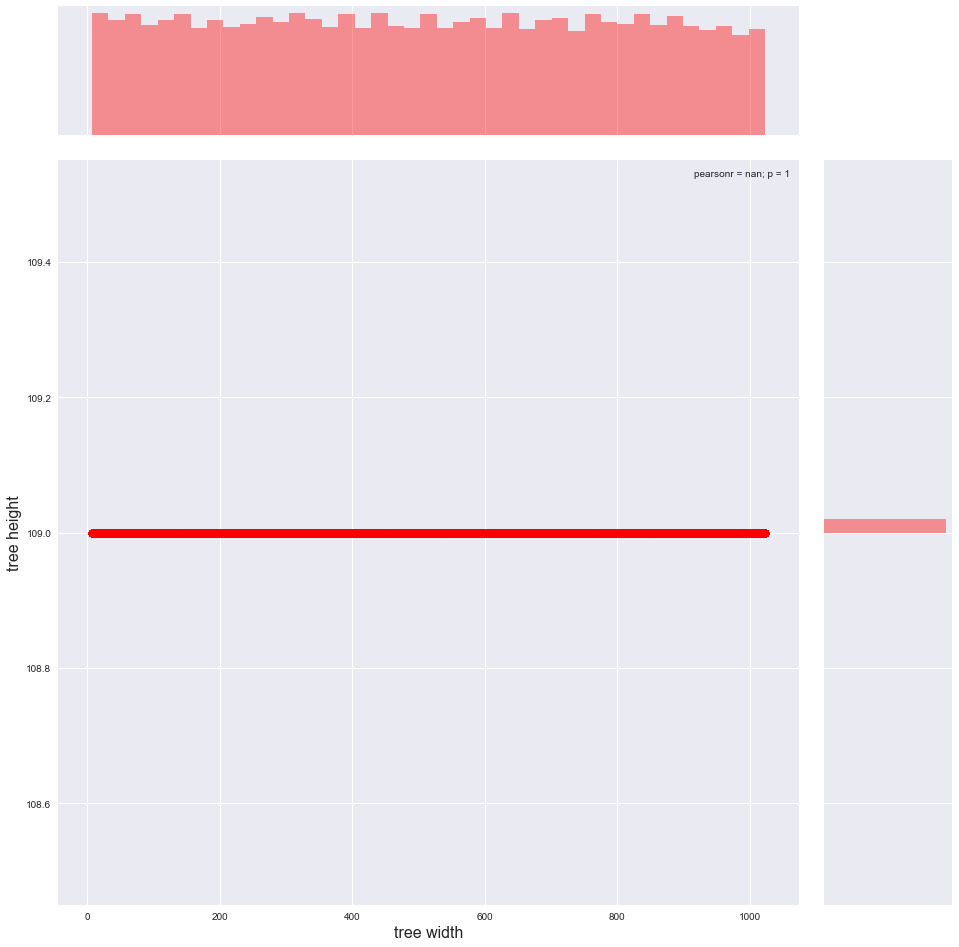

In [21]:
print_jointplots(filenames[2])
print_datainfo(filenames[2])

## RANDOM with constant widths

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: 3_RANDCONSTWIDTH.in
Options count: 65536
:::Widths:::
min: 47
max: 47
mean: 47.00
variance: 0.00
standard deviation: 0.00
skewness: 0.00
kurtosis: -3.00
:::Heights:::
min: 13
max: 1201
mean: 607.12
variance: 119868.45
standard deviation: 346.22
skewness: -0.00
kurtosis: -1.20




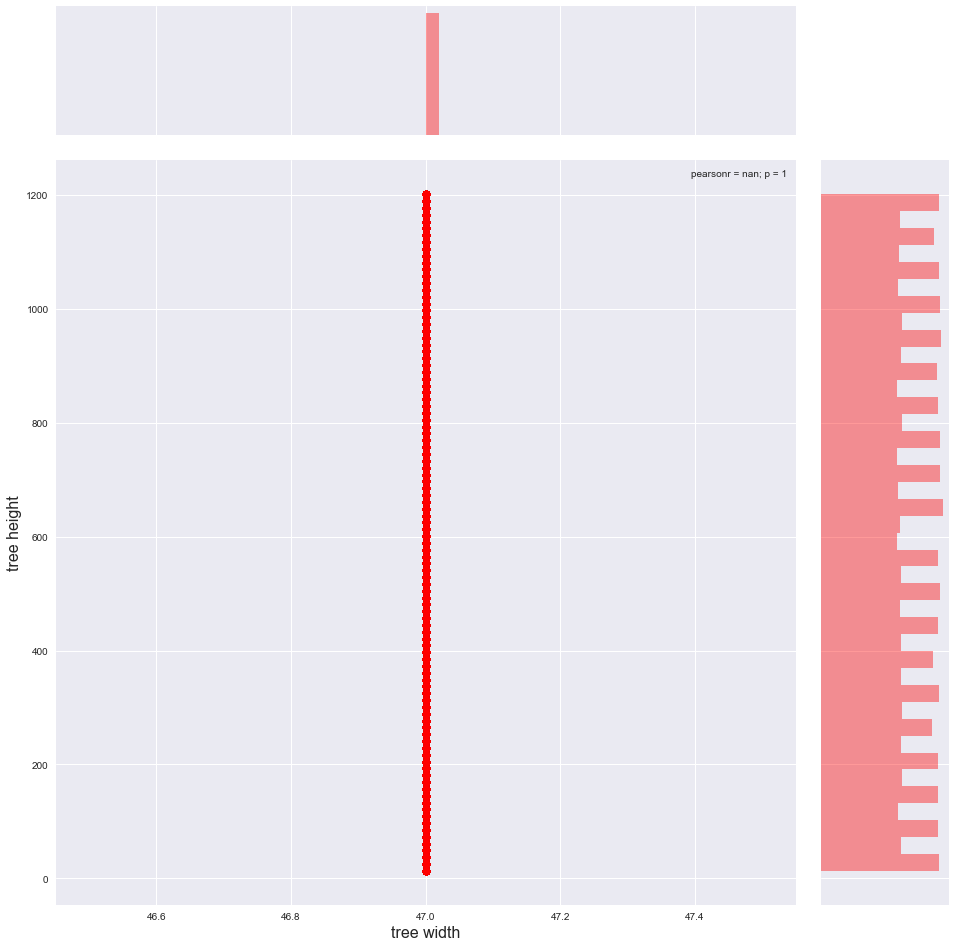

In [22]:
print_jointplots(filenames[3])
print_datainfo(filenames[3])

## SKEWED

file: 4_SKEWED.in
Options count: 65536
:::Widths:::
min: 7
max: 1023
mean: 66.00
variance: 9113.99
standard deviation: 95.47
skewness: 8.48
kurtosis: 77.74
:::Heights:::
min: 13
max: 3601
mean: 631.03
variance: 177726.27
standard deviation: 421.58
skewness: 1.85
kurtosis: 9.65




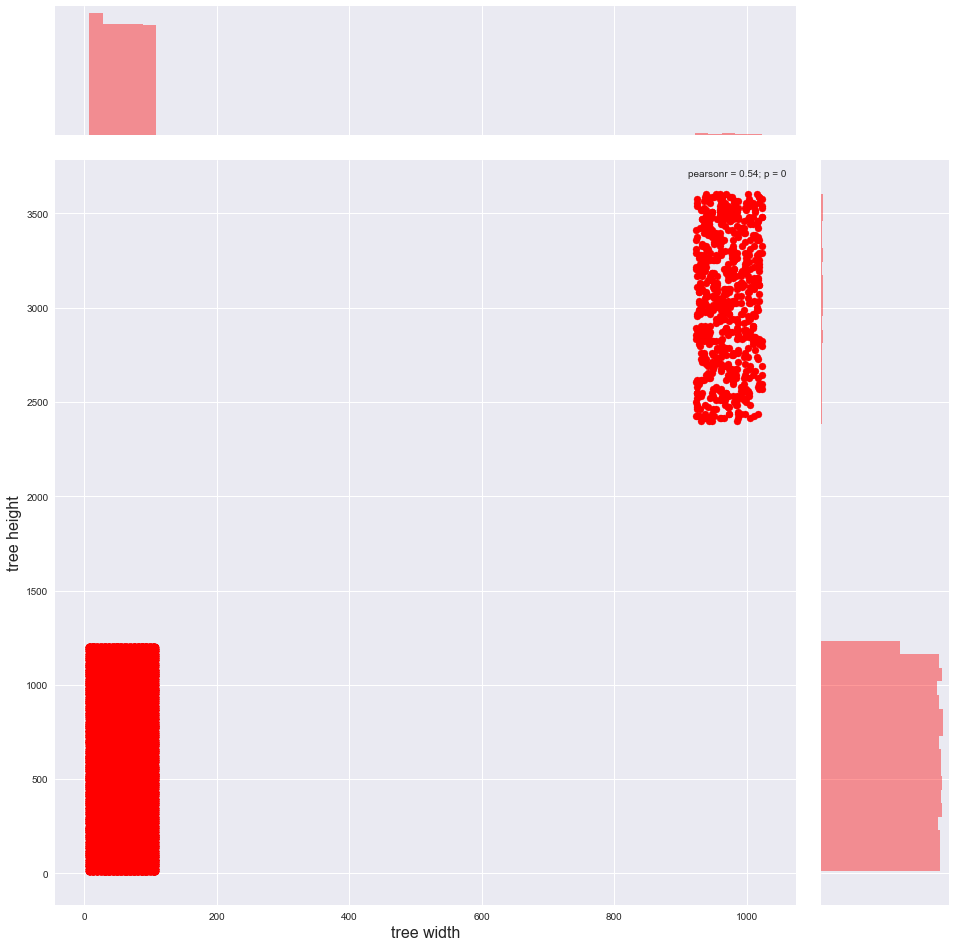

In [23]:
print_jointplots(filenames[4])
print_datainfo(filenames[4])

## SKEWED with constant height

file: 5_SKEWEDCONSTHEIGHT.in
Options count: 65536
:::Widths:::
min: 7
max: 1023
mean: 66.17
variance: 9174.54
standard deviation: 95.78
skewness: 8.47
kurtosis: 77.70
:::Heights:::
min: 13
max: 1201
mean: 602.27
variance: 121525.23
standard deviation: 348.60
skewness: 0.01
kurtosis: -1.22




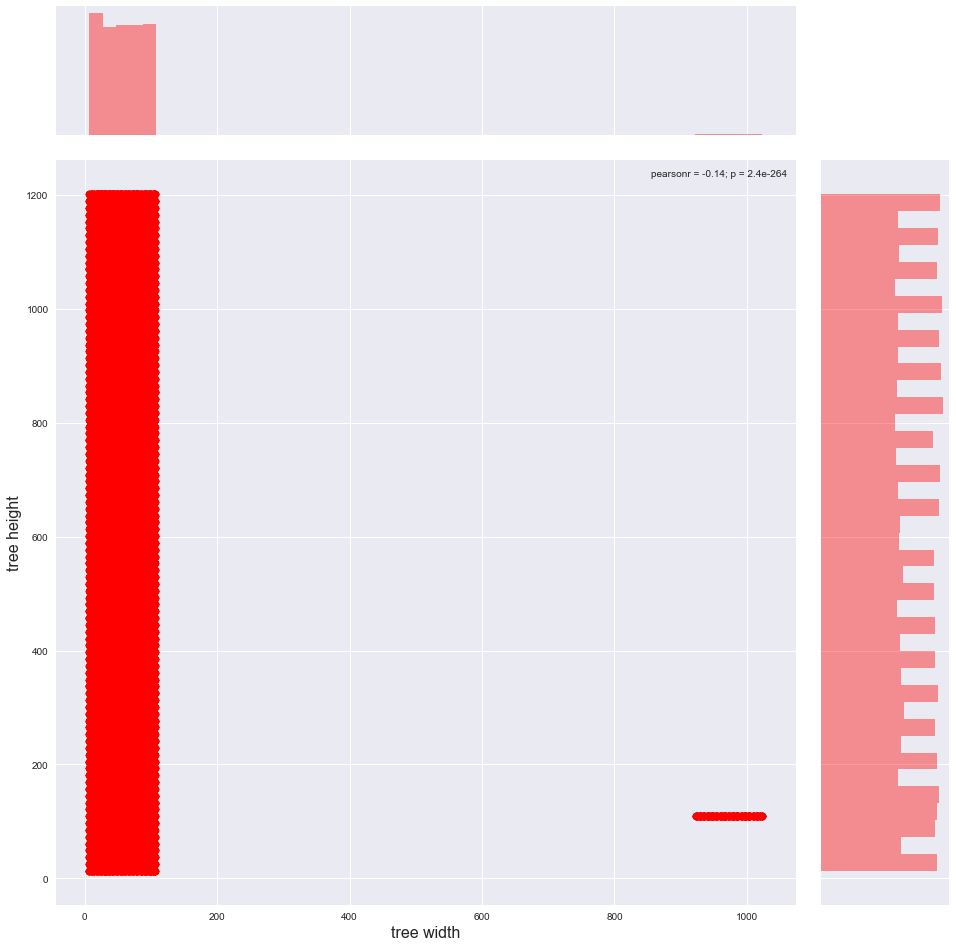

In [24]:
print_jointplots(filenames[5])
print_datainfo(filenames[5])

## SKEWED with constant width

file: 6_SKEWEDCONSTWIDTH.in
Options count: 65536
:::Widths:::
min: 7
max: 107
mean: 56.94
variance: 858.03
standard deviation: 29.29
skewness: 0.01
kurtosis: -1.19
:::Heights:::
min: 13
max: 3601
mean: 630.00
variance: 178094.35
standard deviation: 422.01
skewness: 1.82
kurtosis: 9.44




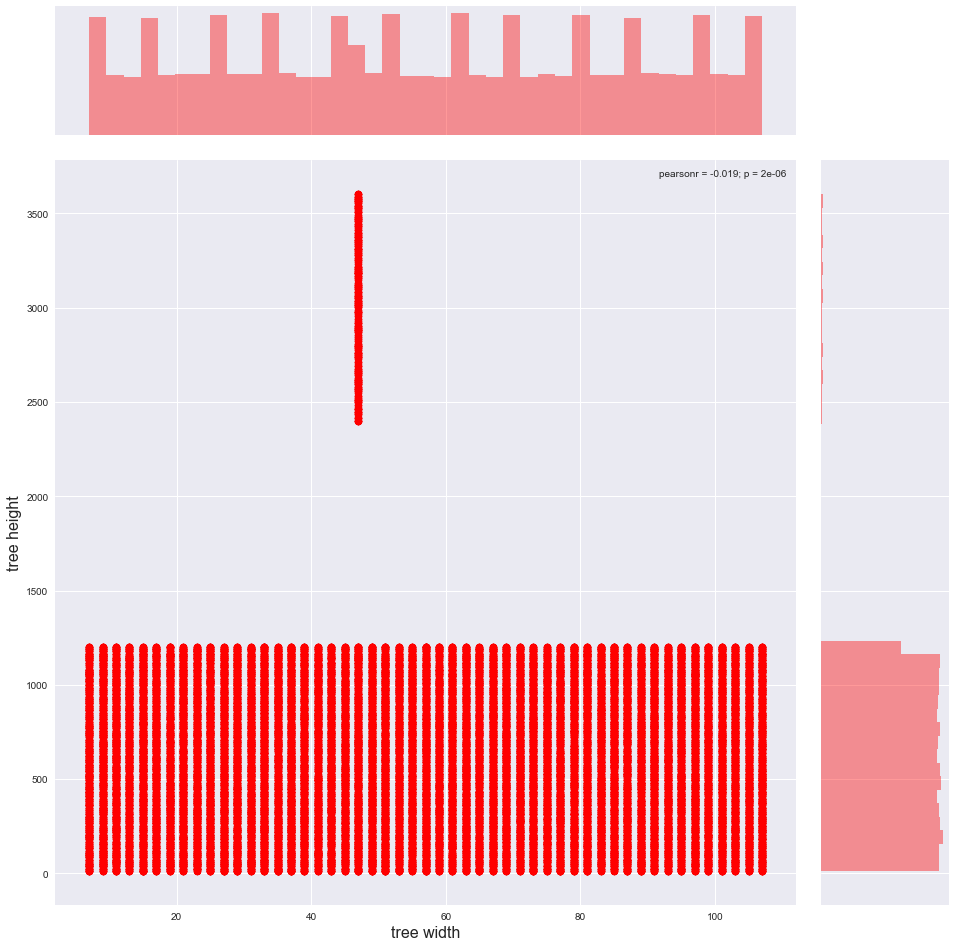

In [25]:
print_jointplots(filenames[6])
print_datainfo(filenames[6])

# DATA SETS BY WOJCIECH

In [24]:
w_filenames_unif = ["rand_h_unif_w_unifdist_100000.in",
"rand_hw_unifdist_100000.in",
"rand_hw_w_256_unifdist_100000.in",
"rand_w_unif_h_unifdist_100000.in",
"skew_h_1_rand_w_unifdist_100000.in",
"skew_h_10_rand_w_unifdist_100000.in",
"skew_hw_1_unifdist_100000.in",
"skew_hw_1_w_256_unifdist_100000.in",
"skew_hw_10_unifdist_100000.in",
"skew_hw_10_w_256_unifdist_100000.in",
"skew_w_1_rand_h_unifdist_100000.in",
"skew_w_10_rand_h_unifdist_100000.in",
"unif_book_hw_100000.in",
"unif_hw_100000.in"]

w_filenames_unif = list(map(lambda f: 'wmp/wmp/unifdist_100000/' + f, w_filenames_unif))

In [25]:
for f in w_filenames_unif:
# print_jointplots(w_filenames[0])
    print_datainfo(f)

file: wmp/wmp/unifdist_100000/rand_h_unif_w_unifdist_100000.in
Options count: 100000
:::Widths:::
min: 1023
max: 1023
mean: 1023.00
variance: 0.00
standard deviation: 0.00
:::Heights:::
min: 13
max: 997
mean: 505.52
variance: 80483.64
standard deviation: 283.70


file: wmp/wmp/unifdist_100000/rand_hw_unifdist_100000.in
Options count: 100000
:::Widths:::
min: 7
max: 1023
mean: 514.39
variance: 86212.12
standard deviation: 293.62
:::Heights:::
min: 13
max: 997
mean: 506.32
variance: 80153.72
standard deviation: 283.11


file: wmp/wmp/unifdist_100000/rand_hw_w_256_unifdist_100000.in
Options count: 100000
:::Widths:::
min: 7
max: 255
mean: 132.73
variance: 5161.70
standard deviation: 71.84
:::Heights:::
min: 13
max: 997
mean: 504.15
variance: 80219.80
standard deviation: 283.23


file: wmp/wmp/unifdist_100000/rand_w_unif_h_unifdist_100000.in
Options count: 100000
:::Widths:::
min: 7
max: 1023
mean: 513.82
variance: 85550.98
standard deviation: 292.49
:::Heights:::
min: 997
max: 997
mean: 9

In [27]:
w_filenames_norm = [
"rand_h_unif_w_normdist_100000.in",
"rand_hw_normdist_100000.in",
"rand_hw_w_256_normdist_100000.in",
"rand_w_unif_h_normdist_100000.in",
"skew_h_1_rand_w_normdist_100000.in",
"skew_h_10_rand_w_normdist_100000.in",
"skew_hw_1_normdist_100000.in",
"skew_hw_1_w_256_normdist_100000.in",
"skew_hw_10_normdist_100000.in",
"skew_hw_10_w_256_normdist_100000.in",
"skew_w_1_rand_h_normdist_100000.in",
"skew_w_10_rand_h_normdist_100000.in",
"unif_book_hw_100000.in",
"unif_hw_100000.in"
]

w_filenames_norm = list(map(lambda f: 'wmp/wmp/normdist_100000/' + f, w_filenames_norm))

In [28]:
for f in w_filenames_norm:
# print_jointplots(w_filenames[0])
    print_datainfo(f)

file: wmp/wmp/normdist_100000/rand_h_unif_w_normdist_100000.in
Options count: 100000
:::Widths:::
min: 1023
max: 1023
mean: 1023.00
variance: 0.00
standard deviation: 0.00
:::Heights:::
min: 13
max: 997
mean: 505.97
variance: 26097.45
standard deviation: 161.55


file: wmp/wmp/normdist_100000/rand_hw_normdist_100000.in
Options count: 100000
:::Widths:::
min: 7
max: 1023
mean: 516.27
variance: 27920.87
standard deviation: 167.10
:::Heights:::
min: 13
max: 997
mean: 506.33
variance: 26099.77
standard deviation: 161.55


file: wmp/wmp/normdist_100000/rand_hw_w_256_normdist_100000.in
Options count: 100000
:::Widths:::
min: 7
max: 255
mean: 132.40
variance: 1667.26
standard deviation: 40.83
:::Heights:::
min: 13
max: 997
mean: 504.97
variance: 26104.71
standard deviation: 161.57


file: wmp/wmp/normdist_100000/rand_w_unif_h_normdist_100000.in
Options count: 100000
:::Widths:::
min: 7
max: 1023
mean: 514.93
variance: 27678.35
standard deviation: 166.37
:::Heights:::
min: 997
max: 997
mean: 9